Tutorial 1: Grids
=================

In this example, we'll create `Grid2D`'s of Cartesian $(y,x)$ coordinates, representing the arc-second coordinate `Grid2D`
of an observed data-set (e.g. imaging).

In [1]:
#%matplotlib inline
%matplotlib inline
from pyprojroot import here
workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import autolens as al
import autolens.plot as aplt

/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace
Working Directory has been set to `/mnt/c/Users/Jammy/Code/PyAuto/autolens_workspace`


In **PyAutoLens**, a `Grid2D` is a set of two-dimensional $(y,x)$ coordinates (in arc-seconds) that are deflected and 
traced by a strong lensing system.

The $(y,x)$ coordinates on the `Grid2D` are aligned with the image we analyze, such that each coordinate maps to the 
centre  of each image-pixel. Lets make a `Grid2D` using 100 x 100 pixels, with a pixel scale (arcsecond-to-pixel 
conversion factor) of 0.05", giving us a 5" x 5" grid.

In [2]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05)

First, lets plot this `Grid2D`, which shows that it is a fairly boring uniform `Grid2D` of dots.

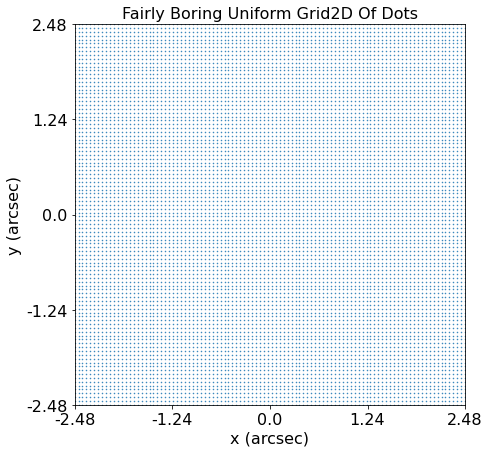

In [3]:
mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Fairly Boring Uniform Grid2D Of Dots")
)

grid_plotter = aplt.Grid2DPlotter(grid=grid, mat_plot_2d=mat_plot_2d)
grid_plotter.figure()

We can print each coordinate of this `Grid2D`, revealing that it consists of a set of arc-second coordinates (where the 
spacing between each coordinate corresponds to the `pixel_scales` of 0.05" defined above).

In [4]:
print("(y,x) pixel 0:")
print(grid.native[0, 0])
print("(y,x) pixel 1:")
print(grid.native[0, 1])
print("(y,x) pixel 2:")
print(grid.native[0, 2])
print("(y,x) pixel 100:")
print(grid.native[1, 0])
print("etc.")

(y,x) pixel 0:
[ 2.475 -2.475]
(y,x) pixel 1:
[ 2.475 -2.425]
(y,x) pixel 2:
[ 2.475 -2.375]
(y,x) pixel 100:
[ 2.425 -2.475]
etc.


The `Grid2D``s is accessible as ndarrays of two different shapes:
 
 - native: an ndarray of shape [total_y_image_pixel, total_x_image_pixels, 2] which is therefore the 'native' shape and 
 resolution of the data we analyse.
 
 - slim: an ndarray of shape [total_y_image_pixels*total_x_image_pixels, 2] which is therefore a slimmed-down 
 representation the grid.

In [5]:
print("(y,x) pixel 0 (accessed via native):")
print(grid.native[0, 0])
print("(y,x) pixel 0 (accessed via slim 1D):")
print(grid.slim[0])

(y,x) pixel 0 (accessed via native):
[ 2.475 -2.475]
(y,x) pixel 0 (accessed via slim 1D):
[ 2.475 -2.475]


The details of why there are `native` and `slim`  structures available will become apparent throughout 
the **HowToLens** tutorials. For now, don't worry about it! 

The shapes of the `Grid2D` in its `native` and `slim` formats are also available, confirming that this grid has a 
`native` resolution of (100 x 100) and a `slim` resolution of 10000 coordinates.

In [6]:
print(grid.shape_native)
print(grid.shape_slim)

(100, 100)
10000


Note that neither of the shapes above include the third index of the `Grid` which has dimensions 2 (corresponding to 
the y and x coordinates). This is accessible by using the standard numpy `shape` method on each grid.

In [7]:
print(grid.native.shape)
print(grid.slim.shape)

(100, 100, 2)
(10000, 2)


We can print the entire `Grid2D` in its `slim` or `native` form. 

In [8]:
print(grid.native)
print(grid.slim)

[[[ 2.475 -2.475]
  [ 2.475 -2.425]
  [ 2.475 -2.375]
  ...
  [ 2.475  2.375]
  [ 2.475  2.425]
  [ 2.475  2.475]]

 [[ 2.425 -2.475]
  [ 2.425 -2.425]
  [ 2.425 -2.375]
  ...
  [ 2.425  2.375]
  [ 2.425  2.425]
  [ 2.425  2.475]]

 [[ 2.375 -2.475]
  [ 2.375 -2.425]
  [ 2.375 -2.375]
  ...
  [ 2.375  2.375]
  [ 2.375  2.425]
  [ 2.375  2.475]]

 ...

 [[-2.375 -2.475]
  [-2.375 -2.425]
  [-2.375 -2.375]
  ...
  [-2.375  2.375]
  [-2.375  2.425]
  [-2.375  2.475]]

 [[-2.425 -2.475]
  [-2.425 -2.425]
  [-2.425 -2.375]
  ...
  [-2.425  2.375]
  [-2.425  2.425]
  [-2.425  2.475]]

 [[-2.475 -2.475]
  [-2.475 -2.425]
  [-2.475 -2.375]
  ...
  [-2.475  2.375]
  [-2.475  2.425]
  [-2.475  2.475]]]
[[ 2.475 -2.475]
 [ 2.475 -2.425]
 [ 2.475 -2.375]
 ...
 [-2.475  2.375]
 [-2.475  2.425]
 [-2.475  2.475]]


A `Grid2D` can also have a sub-grid, which splits each pixel on the `Grid2D` into sub-pixels of 
size (sub_size x sub_size). These additional pixels are used to perform calculations more accurately.

In [9]:
grid = al.Grid2D.uniform(shape_native=(100, 100), pixel_scales=0.05, sub_size=2)

We specified a sub_size of 2 above, therefore we expect 4 (2 x 2) times more sub-pixels than pixels. We can see this 
is the case by inspecting the `Grid2D` sub_shape attributes.

In [10]:
print(grid.sub_shape_slim)
print(grid.sub_shape_native)

40000
(200, 200)


The first four pixels of our sub-grid correspond to the first four sub-pixels, which form a sub-grid inside the
first `Grid2D` pixel, as follows:

pixel 1

                 ______
              
              I         I
              
              I         I  o = $(y,x)$ centre of
              
 y = 2.475"   I    o    I       Grid2D coordinate.
 
              I         I
              
              I_________I
              
              x = -2.475


Sub-pixels 1, 2, 3 & 4

                 ______
               
              I         I
              
              I  o   o  I  o = $(y,x)$ centre of sub
              
 y = 2.475"   I         I       Grid2D coordinates.
 
              I  o   o  I
              
              I_________I
              
              x = -2.475

The sub-pixels coordinate are spaced uniformly between the pixel`s edges
(which are at y = (2.45", 2.5") and x = (-2.5". -2.45") )

By default, a `Grid2D` is stored in 1D, and we can access its elements without specifying `slim`

In [11]:
print("(y,x) sub-pixel 0 (of pixel 0):")
print(grid[0])
print("(y,x) sub-pixel 1 (of pixel 0):")
print(grid[1])
print("(y,x) sub-pixel 2 (of pixel 0):")
print(grid[2])
print("(y,x) sub-pixel 3 (of pixel 0):")
print(grid[3])

(y,x) sub-pixel 0 (of pixel 0):
[ 2.4875 -2.4875]
(y,x) sub-pixel 1 (of pixel 0):
[ 2.4875 -2.4625]
(y,x) sub-pixel 2 (of pixel 0):
[ 2.4625 -2.4875]
(y,x) sub-pixel 3 (of pixel 0):
[ 2.4625 -2.4625]


The sub-grid then continues on to the next `Grid2D` pixels (and so on)

In [12]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[4])
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid[5])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4125]
etc.


We can again access these coordinates via `native`.

In [13]:
print("(y,x) sub-pixel 0 (of pixel 1):")
print(grid.native[0, 2])
print("(y,x) sub-pixel 1 (of pixel 1):")
print(grid.native[0, 3])
print("etc.")

(y,x) sub-pixel 0 (of pixel 1):
[ 2.4875 -2.4375]
(y,x) sub-pixel 1 (of pixel 1):
[ 2.4875 -2.4125]
etc.


Congratulations, you`ve completed your first **PyAutoLens** tutorial! Before moving on to the next one, experiment with 
**PyAutoLens** by doing the following:

1) Change the pixel-scale of the `Grid2D`'s - what happens to the Cartesian coordinates?
2) Change the resolution of the `Grid2D`'s - what happens Cartesian coordinates?
3) Change the sub-grid size - what do you note about the pixel-scale of sub pixels?